# Quickly plot target images

In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt
import proplot as pplt
from scipy import signal

sys.path.append('/Users/46h/Research/')
from scdist.measurement import tis
from scdist.tools import utils

In [2]:
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'dusk_r'
pplt.rc['figure.facecolor'] = 'white'
pplt.rc['grid'] = False
pplt.rc['grid.alpha'] = 0.05

Load the image arrays.

In [3]:
filenames = utils.list_files('_output/data/')
filenames = [filename for filename in filenames if 'image' in filename]
images = tis.read_files(filenames, n_avg='all', make_square=False)

Excluding 2 duplicates.


Plot each image.

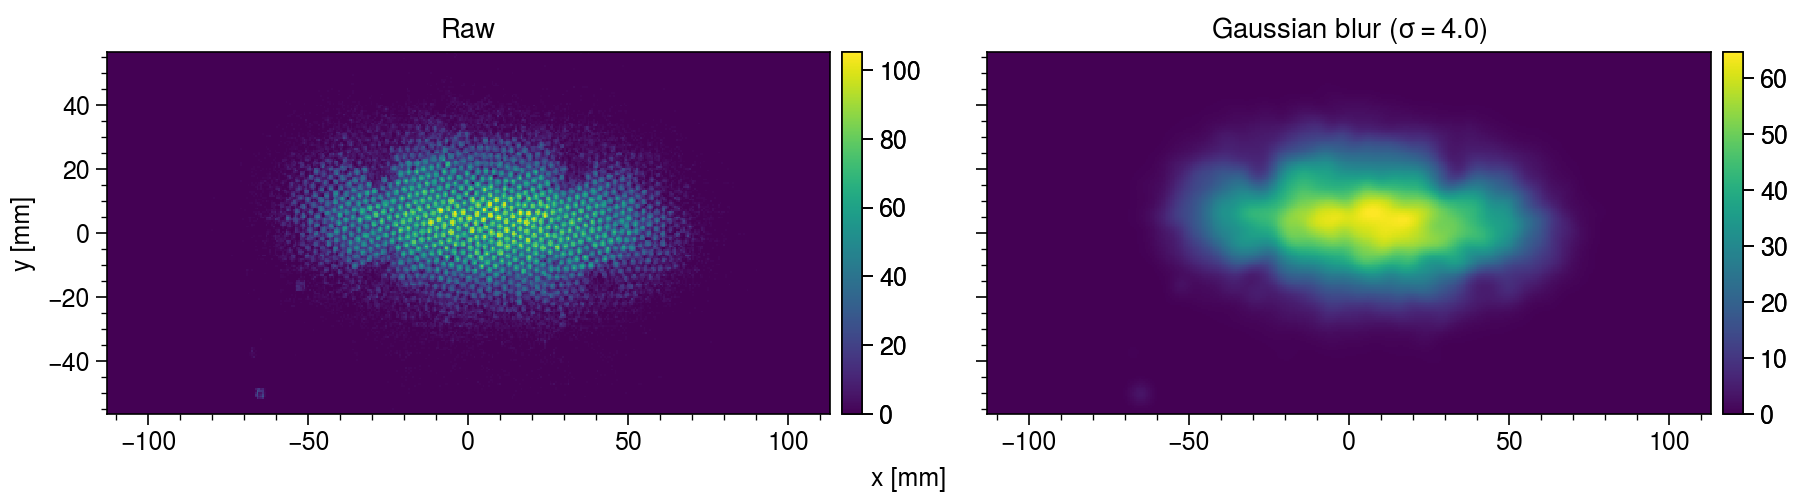

In [29]:
sigma = 4.0
plot_kws = dict(ec='None', cmap='viridis', colorbar=True, colorbar_kw=dict(width=0.1))
for image in images:
    fig, axes = pplt.subplots(ncols=2, figwidth=9.0, wspace=5.0)
    axes[0].pcolormesh(image.xx, image.yy, image.Z.T, **plot_kws)
    axes[1].pcolormesh(image.xx, image.yy, image.filter(sigma).T, **plot_kws)
    axes[0].set_title('Raw')
    axes[1].set_title(r'Gaussian blur ($\sigma = {}$)'.format(sigma))
    axes.format(xlabel='x [mm]', ylabel='y [mm]', aspect=1.0)
    plt.show()